Plot legends identify discrete labels of discrete points. For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool. In Matplotlib, a colorbar is a separate axes that can provide a key for the meaning of colors in a plot. 

In [1]:
import matplotlib.pyplot as plt       
plt.style.use('classic')
import numpy as np 

The simplest colorbar can be created with the plt.colorbar function 

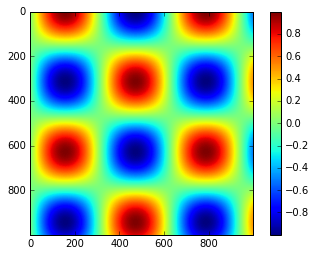

In [2]:
x = np.linspace(0, 10, 1000)       
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I)       
plt.colorbar()

We can specify the colormap using the cmap argument to the plotting function that is creating the visualization 

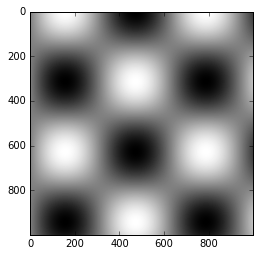

In [3]:
plt.imshow(I, cmap='gray')

Broadly, you should be aware of three different categories of colormaps: 
Sequential colormaps: These consist of one continuous sequence of colors (e.g., binary or viridis). 

Divergent colormaps: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., RdBu or PuOr). 

Qualitative colormaps: These mix colors with no particular sequence (e.g., rainbow or jet)

The jet colormap, which was the default in Matplotlib prior to version 2.0, is an example of a qualitative colormap. Its status as the default was quite unfortunate, because qualitative maps are often a poor choice for representing quantitative data. Among the problems is the fact that qualitative maps usually do not display any uniform progression in brightness as the scale increases. 

In [4]:
from matplotlib.colors import LinearSegmentedColormap

In [5]:
def grayscale_cmap(cmap):    
    """Return a grayscale version of the given colormap"""    
    cmap = plt.cm.get_cmap(cmap)    
    colors = cmap(np.arange(cmap.N))
    # convert RGBA to perceived grayscale luminance    
    # cf. http://alienryderflex.com/hsp.html    
    RGB_weight = [0.299, 0.587, 0.114]    
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))    
    colors[:, :3] = luminance[:, np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):    
    """Plot a colormap with its grayscale equivalent"""    
    cmap = plt.cm.get_cmap(cmap)    
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)    
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))    
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

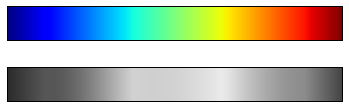

In [6]:
view_colormap('jet')

 Even in full color, this uneven brightness means that the eye will be drawn to certain portions of the color range, which will potentially emphasize unimportant parts of the dataset. It’s better to use a colormap such as viridis (the default as of Matplotlib 2.0), which is specifically constructed to have an even brightness variation across the range. Thus, it not only plays well with our color perception, but also will translate well to grayscale printing 

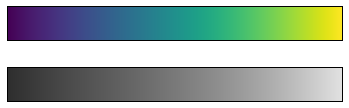

In [8]:
view_colormap('viridis')

for continuous data is the cubehelix colormap:

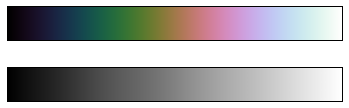

In [9]:
view_colormap('cubehelix')

For other situations, such as showing positive and negative deviations from some mean, dual-color colorbars such as RdBu (short for Red-Blue) can be useful. 

NOTE: that the positive-negative information will be lost upon translation to grayscale!

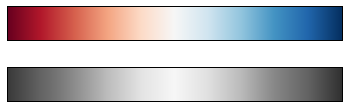

In [10]:
view_colormap('RdBu')

# Color Limits and Extensions

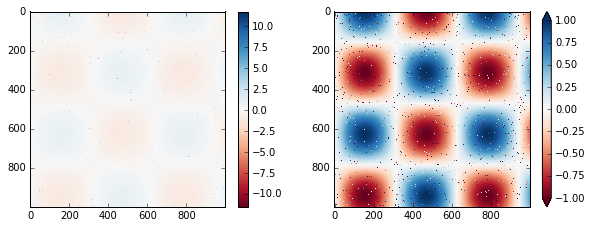

In [11]:
# make noise in 1% of the image pixels        
speckles = (np.random.random(I.shape) < 0.01)        
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)        
plt.imshow(I, cmap='RdBu')        
plt.colorbar()
plt.subplot(1, 2, 2)        
plt.imshow(I, cmap='RdBu')        
plt.colorbar(extend='both')        
plt.clim(-1, 1)

the default color limits respond to the noisy pixels, and the range of the noise completely washes out the pattern we are interested in. In the right panel, we manually set the color limits, and add extensions to indicate values that are above or below those limits. 

# Discrete Color Bars

Colormaps are by default continuous, but sometimes you’d like to represent discrete values. The easiest way to do this is to use the plt.cm.get_cmap() function, and pass the name of a suitable colormap along with the number of desired bins 

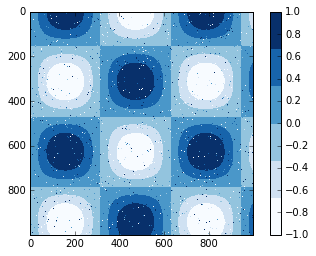

In [12]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))        
plt.colorbar()        
plt.clim(-1, 1);